In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('adult.csv')
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
df.income.unique()

array(['<=50K', '>50K'], dtype=object)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
df.nunique()


age                   74
workclass              9
fnlwgt             28523
education             16
educational-num       16
marital-status         7
occupation            15
relationship           6
race                   5
gender                 2
capital-gain         123
capital-loss          99
hours-per-week        96
native-country        42
income                 2
dtype: int64

In [7]:
def convert_marital_status(status):
    if status in ['Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse']:
        return 'married'
    elif status in ['Never-married', 'Separated', 'Widowed']:
        return 'single'
    else:
        return 'divorced'

df['marital-status'] = df['marital-status'].apply(convert_marital_status)

df['native-country'] = df['native-country'].replace('Outlying-US(Guam-USVI-etc)' , 'US Minor Islands')

df = df.drop(['capital-gain', 'capital-loss', 'fnlwgt'], axis=1)

income_mapping = {'<=50K': 0, '>50K': 1}
df['income'] = df['income'].map(income_mapping)

In [8]:
df

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,25,Private,11th,7,single,Machine-op-inspct,Own-child,Black,Male,40,United-States,0
1,38,Private,HS-grad,9,married,Farming-fishing,Husband,White,Male,50,United-States,0
2,28,Local-gov,Assoc-acdm,12,married,Protective-serv,Husband,White,Male,40,United-States,1
3,44,Private,Some-college,10,married,Machine-op-inspct,Husband,Black,Male,40,United-States,1
4,18,?,Some-college,10,single,?,Own-child,White,Female,30,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,Assoc-acdm,12,married,Tech-support,Wife,White,Female,38,United-States,0
48838,40,Private,HS-grad,9,married,Machine-op-inspct,Husband,White,Male,40,United-States,1
48839,58,Private,HS-grad,9,single,Adm-clerical,Unmarried,White,Female,40,United-States,0
48840,22,Private,HS-grad,9,single,Adm-clerical,Own-child,White,Male,20,United-States,0


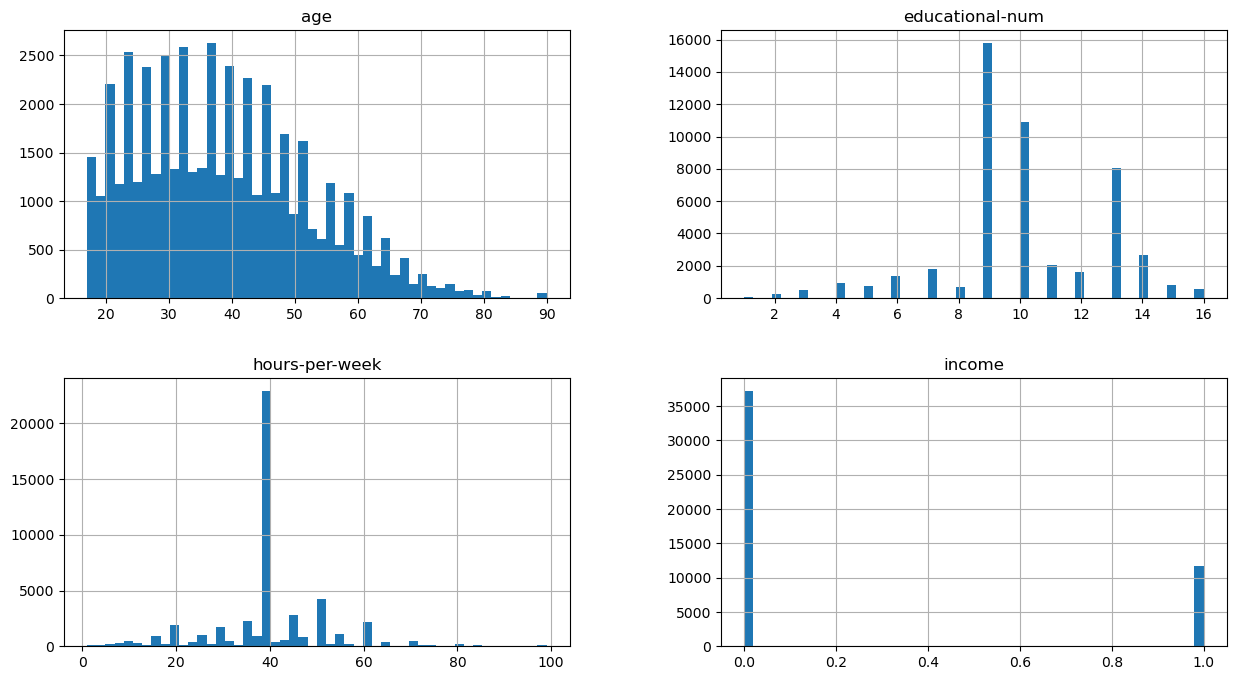

In [9]:
df.hist(figsize=(15, 8),bins = 50)
plt.show()

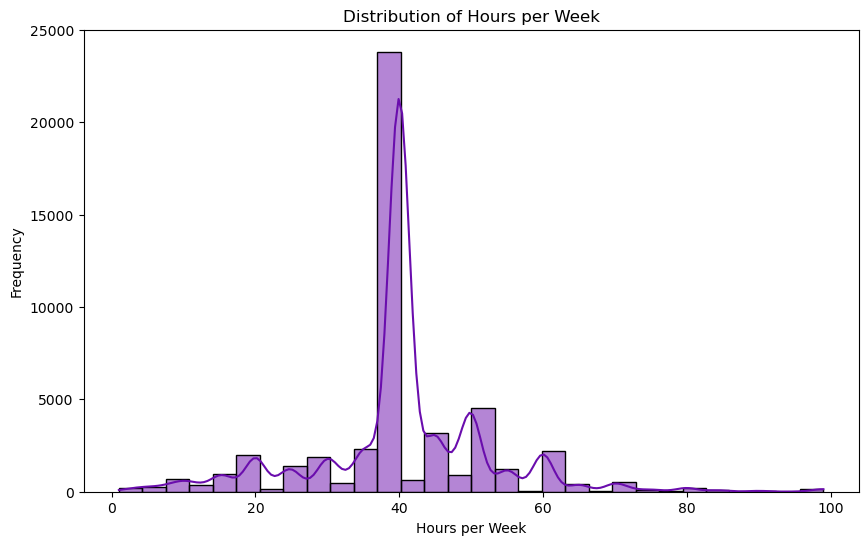

In [27]:
plt.figure(figsize=(10, 6))
sns.histplot(df['hours-per-week'], kde=True, bins=30, color='#6A0DAD')
plt.title('Distribution of Hours per Week')
plt.xlabel('Hours per Week')
plt.ylabel('Frequency')
plt.show()


<Axes: >

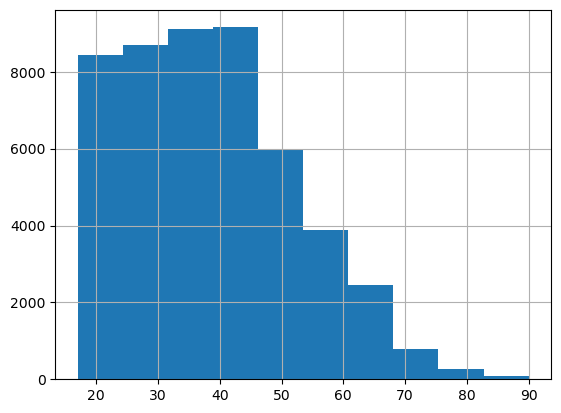

In [30]:
df['age'].hist()


<Axes: >

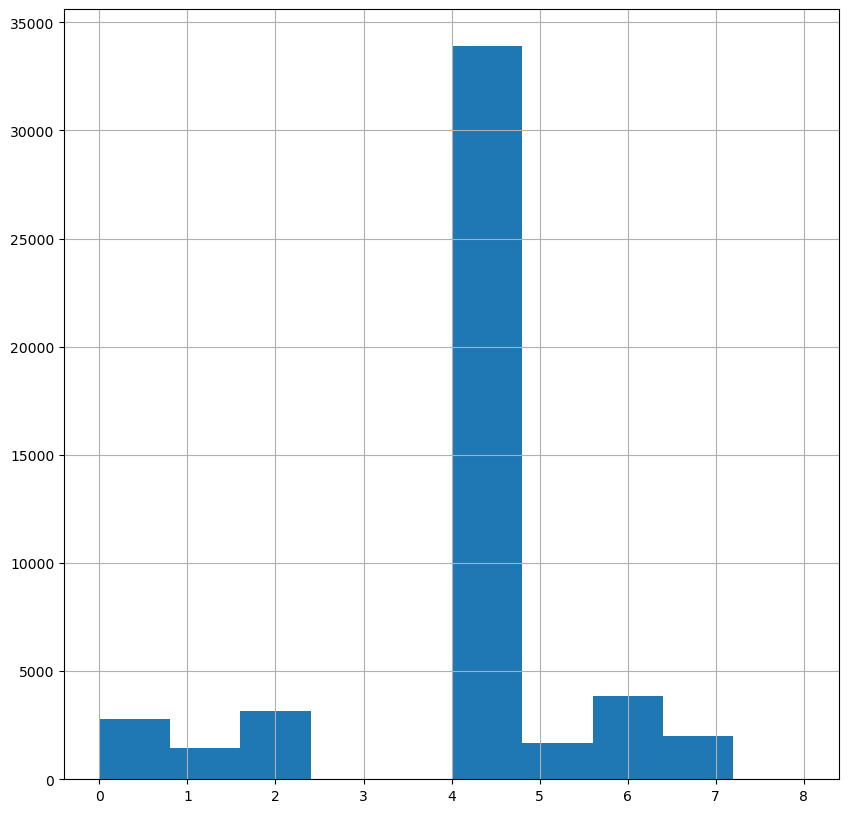

In [31]:
plt.figure(figsize=(10,10))
df['workclass'].hist()


<Axes: xlabel='income', ylabel='age'>

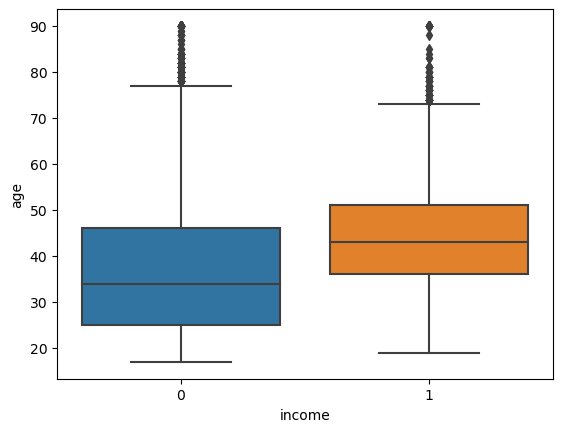

In [33]:
sns.boxplot(x='income',y='age',data=df)


In [10]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

df['gender'] = label_encoder.fit_transform(df['gender'])
df['workclass'] = label_encoder.fit_transform(df['workclass'])
df['education'] = label_encoder.fit_transform(df['education'])
df['marital-status'] = label_encoder.fit_transform(df['marital-status'])
df['occupation'] = label_encoder.fit_transform(df['occupation'])
df['relationship'] = label_encoder.fit_transform(df['relationship'])
df['race'] = label_encoder.fit_transform(df['race'])
df['native-country'] = label_encoder.fit_transform(df['native-country'])
df['income'] = label_encoder.fit_transform(df['income'])
df

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,25,4,1,7,2,7,3,2,1,40,39,0
1,38,4,11,9,1,5,0,4,1,50,39,0
2,28,2,7,12,1,11,0,4,1,40,39,1
3,44,4,15,10,1,7,0,2,1,40,39,1
4,18,0,15,10,2,0,3,4,0,30,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,4,7,12,1,13,5,4,0,38,39,0
48838,40,4,11,9,1,7,0,4,1,40,39,1
48839,58,4,11,9,2,1,4,4,0,40,39,0
48840,22,4,11,9,2,1,3,4,1,20,39,0


In [11]:
columns_to_keep = ['workclass', 'educational-num', 'marital-status', 'occupation', 'gender', 'native-country', 'income']
Features = df[columns_to_keep]

In [17]:
X= Features

X = pd.get_dummies(X, columns=['workclass', 'marital-status', 'occupation', 'native-country']).astype(int)

X = X.drop(columns=['income']).values
y = df['income'].values

In [18]:
X

array([[ 7,  1,  0, ...,  1,  0,  0],
       [ 9,  1,  0, ...,  1,  0,  0],
       [12,  1,  0, ...,  1,  0,  0],
       ...,
       [ 9,  0,  0, ...,  1,  0,  0],
       [ 9,  1,  0, ...,  1,  0,  0],
       [ 9,  0,  0, ...,  1,  0,  0]])

In [19]:
y

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [22]:
pipeline_lda = Pipeline([
    ('min max scaler', MinMaxScaler()), 
    ('lda', LinearDiscriminantAnalysis(solver='svd')) 
])

pipeline_lda.fit(X_train, y_train)
y_pred_lda = pipeline_lda.predict(X_test)
accuracy_lda = accuracy_score(y_test, y_pred_lda)
print(accuracy_lda*100)

82.5075751371714


In [26]:
pipeline_nb = Pipeline([
    ('Min max scaler', MinMaxScaler()), 
    ('nb', GaussianNB()) 
])

pipeline_nb.fit(X_train, y_train)
y_pred_nb = pipeline_nb.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(accuracy_nb*100)

33.24871017934649
